<a href="https://colab.research.google.com/github/tanriders/Flight_Price_Preiction/blob/main/DS_Marketing_Flight_Price_Prediction__LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Price Preiction**

***Kaggle Data Set*** : https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

***ที่มาของข้อมูล*** <br>
จากปัญหาของเราที่เวลาต้องเดินทางด้วยเครื่องบินนั้น ราคาตั๋วเครื่องบินนั้นมีการเปลี่ยนแปลงตลอดเวลา ทำให้เรานั้นสงสัยว่าปัจจัยใดบ้างที่ส่งผลต่อราคาตั๋วเครื่องบิน เช่น สายการบิน , เมืองต้นทาง , เมืองปลายทาง , เส้นทาง , วันที่ออกเดินทาง , จุดแวะพัก และข้อมูลอื่นๆเพิ่มเติมนั้นส่งผลต่อราคาของตั๋วเครื่องบินหรือไม่ ซึ่งการทราบปัจจัยต่างๆที่ส่งผลต่อราคาของตั๋วเครื่องบินนั้นจะช่วยให้ผู้ที่จะต้องเดินทางด้วยเครื่องบินสามารถจัดเตรียมงบประมาณและตัดสินใจซื้อตั่วเครื่องบินได้อย่างเหมาะสมกับความต้องการหรือสถานการณ์

***คำถามที่จะต้องการหาคำตอบ*** <br>
1. ราคาของตั๋วเครื่องบินขึ้นอยู่กับสายการบินหรือไม่<br>
2. ราคาของตั๋วเครื่องบินขึ้นอยู่กับเวลาขึ้นเครื่อง และเวลาลงเครื่องหรือไม่<br>
3. ราคาของตั๋วเครื่องบินขึ้นอยู่กับจำนวนการเปลี่ยนเครื่องหรือไม่<br>
4. ราคาของตั๋วเครื่องบินขึ้นอยู่กับระยะเวลาการบินหรือไม่<br>
5. ราคาของตั๋วเครื่องบินขึ้นอยู่กับระยะทางระหว่างเมืองต้นทาง และเมืองปลายทางหรือไม่<br>

# **Import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline
import missingno as msno



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/DS-Marketing/Flight Price Prediction/Clean_Dataset.csv")

In [ ]:
print("\n################## Head ##################")
display(df.head())



################## Head ##################


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data Cleansing

In [ ]:
#ตัด column Unnamed ออก
df = df.reindex(columns=['airline',	'flight',	'source_city',	'departure_time','stops','arrival_time',	'destination_city',	'class',	'duration'	,'days_left',	'price'])

#เปลี่ยนชื่อใช้สวยงาม
names = ['Airline', 'Flight', 'Source_City', 'Departure_Time', 'Stop', 'Arrival_Time','Destination_City',
        'Class', 'Duration', 'Days_left', 'Price']
df.columns=names
df.head()

,Airline,Flight,Source_City,Departure_Time,Stop,Arrival_Time,Destination_City,Class,Duration,Days_left,Price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Airline           300153 non-null  object 
 1   Flight            300153 non-null  object 
 2   Source_City       300153 non-null  object 
 3   Departure_Time    300153 non-null  object 
 4   Stop              300153 non-null  object 
 5   Arrival_Time      300153 non-null  object 
 6   Destination_City  300153 non-null  object 
 7   Class             300153 non-null  object 
 8   Duration          300153 non-null  float64
 9   Days_left         300153 non-null  int64  
 10  Price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# **Exploratory Data Analysis**

In [ ]:
df.corr()

<ipython-input-95-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Duration,Days_left,Price
Duration,1.000000,-0.039157,0.204222
Days_left,-0.039157,1.000000,-0.091949
Price,0.204222,-0.091949,1.000000


In [ ]:
df.describe()

,Duration,Days_left,Price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<ipython-input-97-7f06b0c72c12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


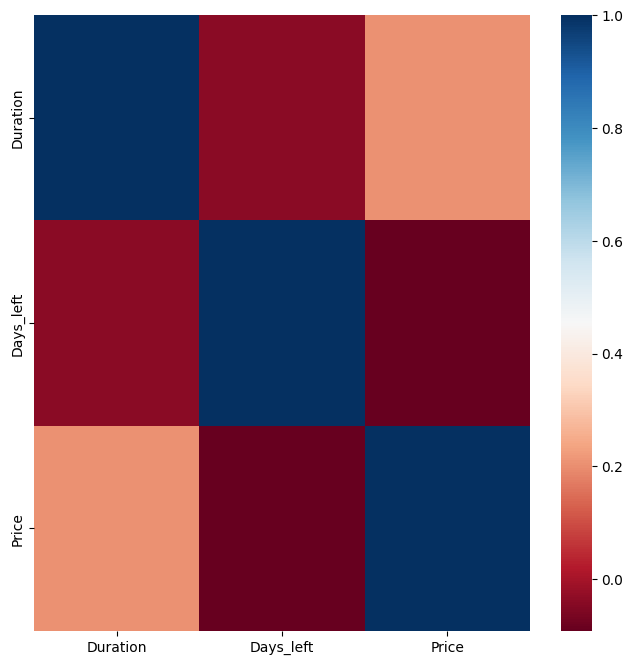

In [ ]:
corr = df.corr()

# Heatmap to look at correlation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [ ]:
#หาราคาเฉลี่ยของแต่ละสายการบิน
df.groupby('Airline')['Price'].mean()

Airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: Price, dtype: float64

In [ ]:
#หาราคาเฉลี่ยของ Class
df.groupby('Class')['Price'].mean()

Class
Business    52540.081124
Economy      6572.342383
Name: Price, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Airline           300153 non-null  object 
 1   Flight            300153 non-null  object 
 2   Source_City       300153 non-null  object 
 3   Departure_Time    300153 non-null  object 
 4   Stop              300153 non-null  object 
 5   Arrival_Time      300153 non-null  object 
 6   Destination_City  300153 non-null  object 
 7   Class             300153 non-null  object 
 8   Duration          300153 non-null  float64
 9   Days_left         300153 non-null  int64  
 10  Price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


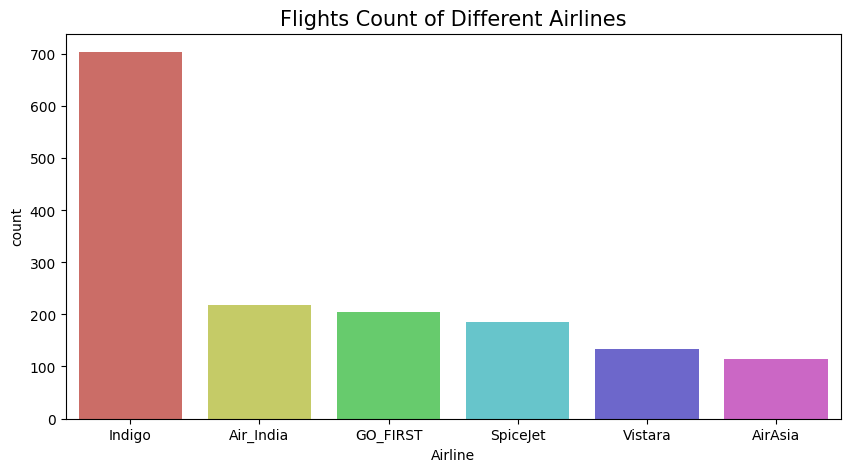

In [ ]:
plt.figure(figsize=(10,5))
flight_Count = df.groupby(['Flight','Airline'],as_index=False).count()

sns.countplot(x = 'Airline',
              data = flight_Count,
              order = flight_Count['Airline'].value_counts().index,
              palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=10)
plt.show()

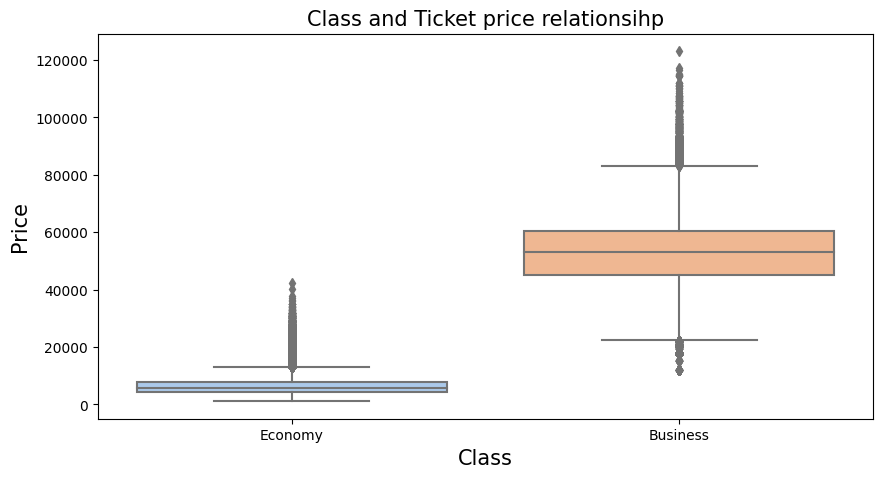

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class',y='Price',data=df,palette='pastel')
plt.title('Class and Ticket price relationsihp',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

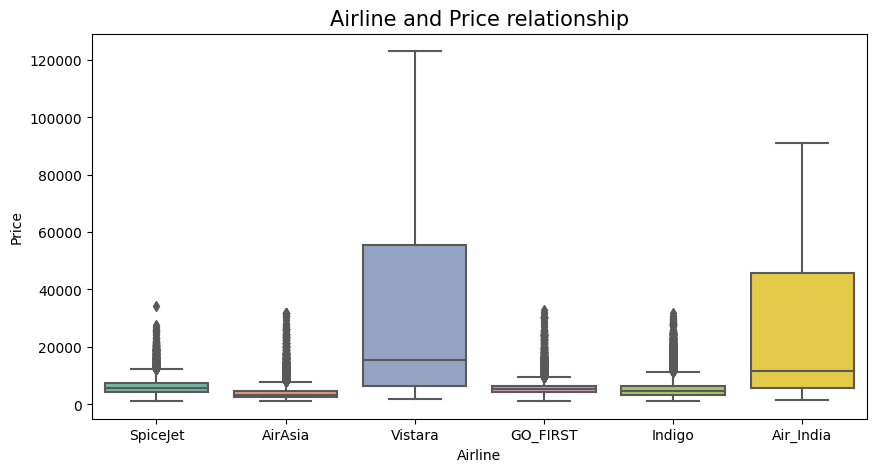

In [ ]:
# ดูราคาโดยรวมของ Airline
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Airline'],y=df['Price'],palette='Set2')
plt.title('Airline and Price relationship',fontsize=15)
plt.xlabel('Airline',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

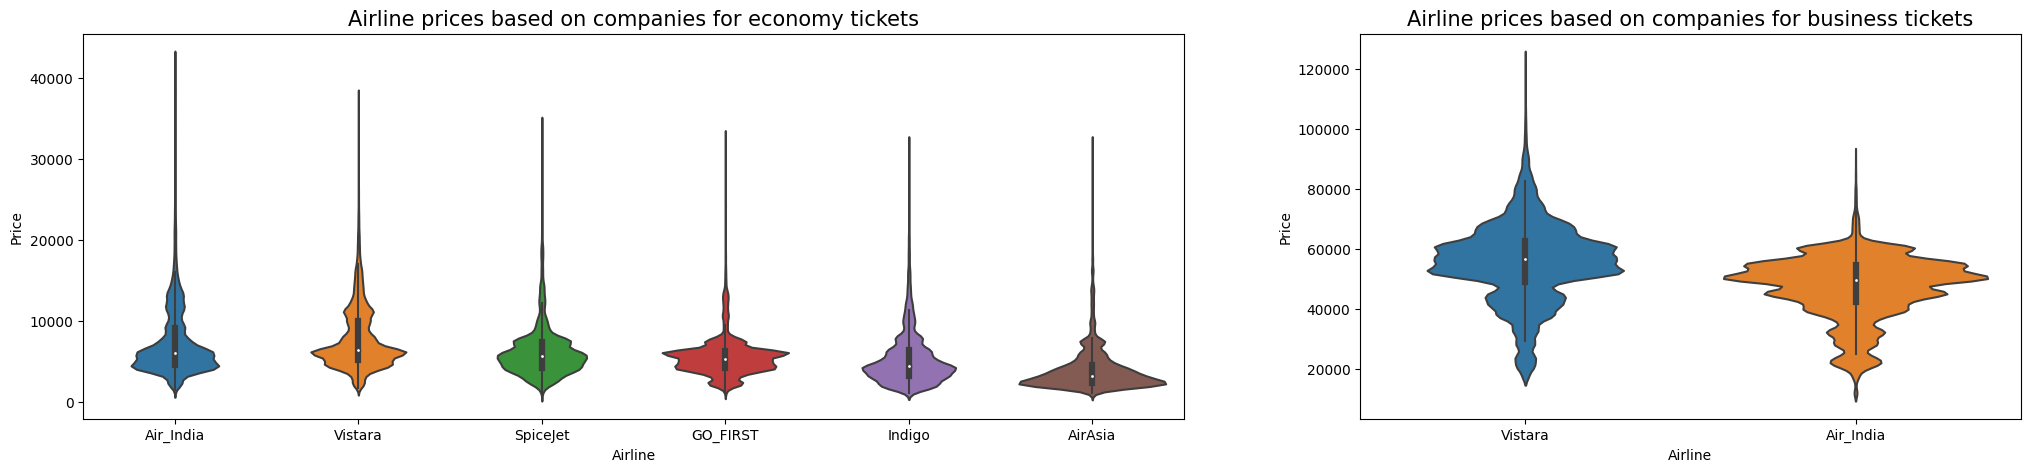

In [ ]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "Price", x = "Airline",data = df.loc[df["Class"]=='Economy'].sort_values("Price", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=15)
sns.violinplot(y = "Price", x = "Airline",data = df.loc[df["Class"]=='Business'].sort_values("Price", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=15)

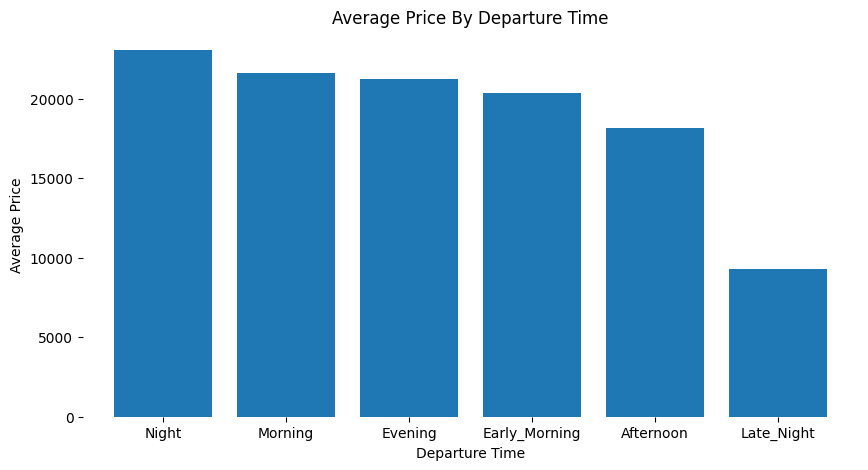

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Departure_Time'])['Price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8)
ax.set(title = "Average Price By Departure Time",
       xlabel = "Departure Time",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

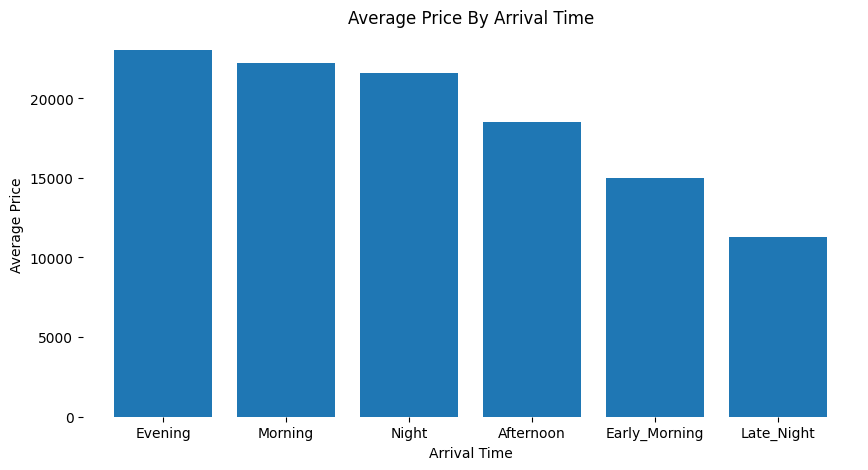

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby(['Arrival_Time'])['Price'].mean().sort_values(ascending=False).plot(kind = 'bar', width= 0.8)
ax.set(title = "Average Price By Arrival Time",
       xlabel = "Arrival Time",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

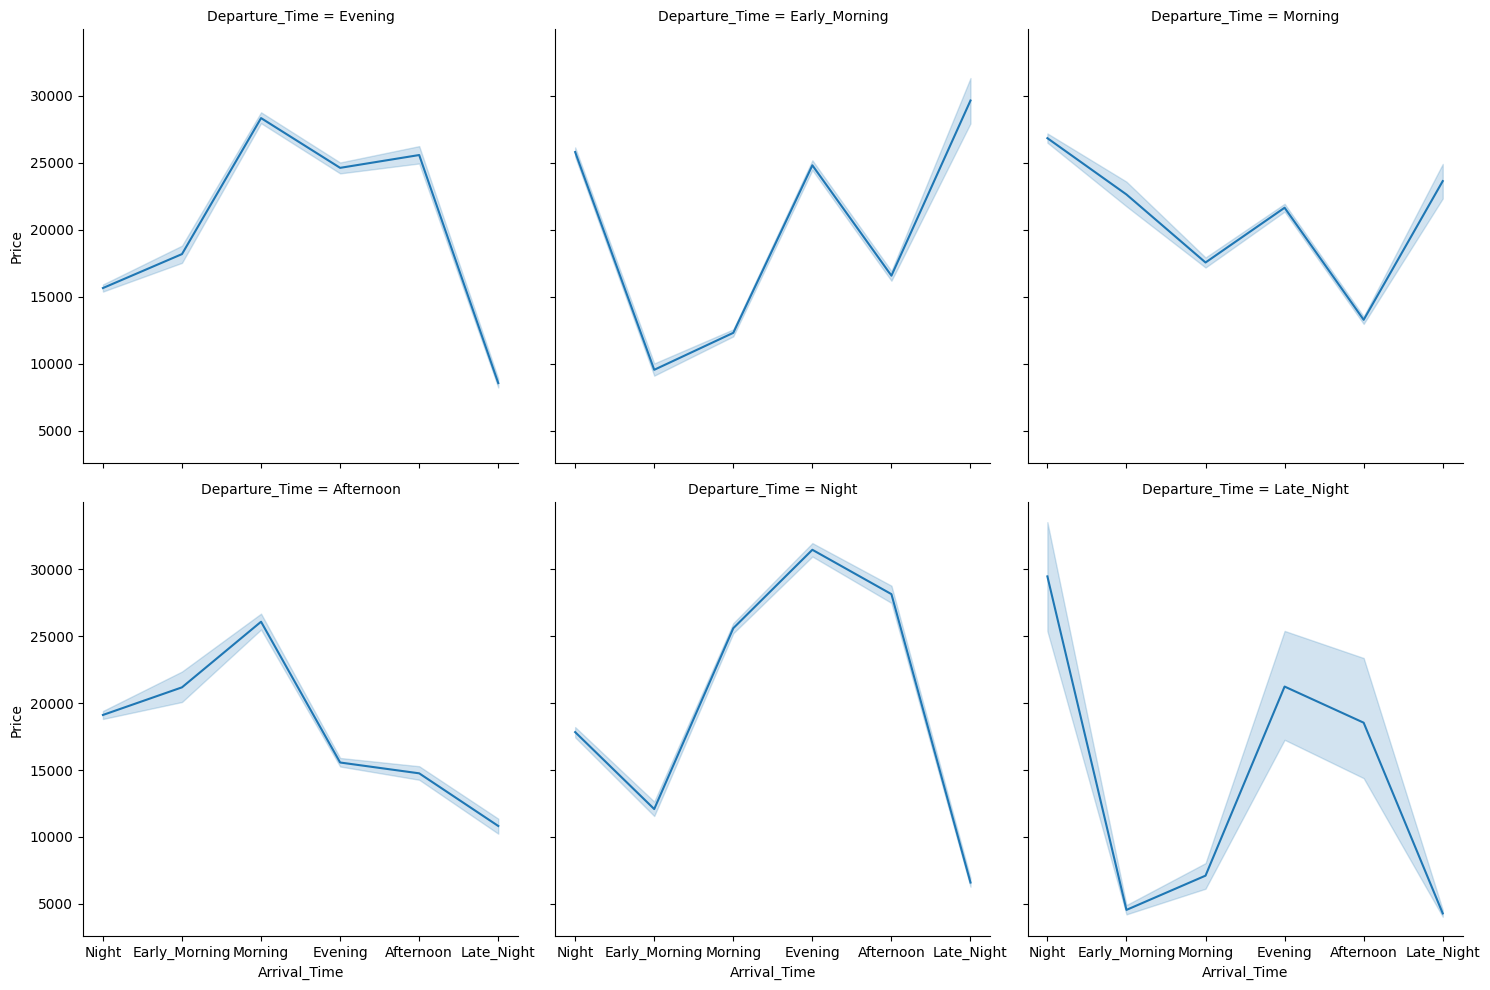

In [ ]:
sns.relplot(col="Departure_Time", y="Price", kind="line",x='Arrival_Time', data=df, col_wrap=3)

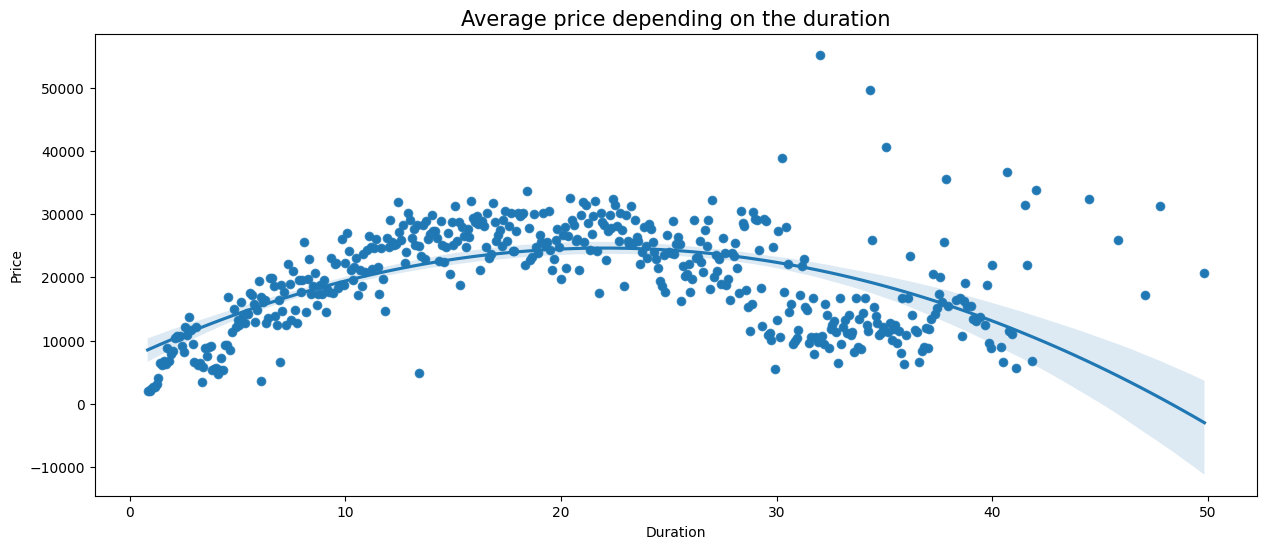

In [ ]:
df_temp = df.groupby(['Duration'])['Price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_temp).set_title("Average price depending on the duration",fontsize=15)
ax = sns.regplot(x="Duration", y="Price", data=df_temp, order=2)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

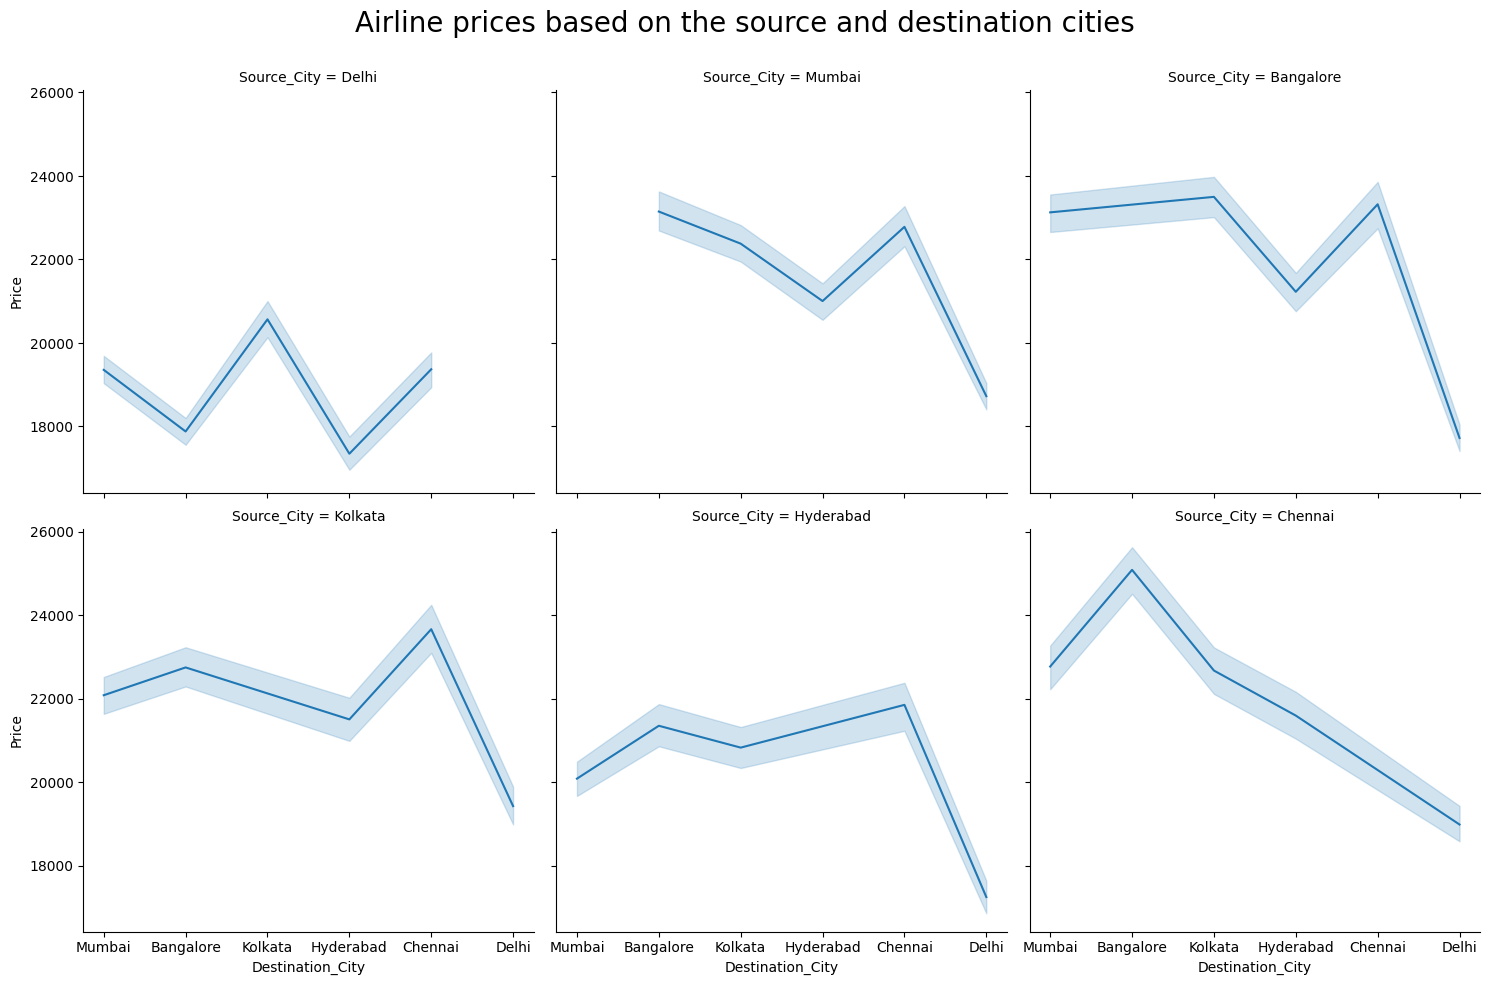

In [ ]:
ax = sns.relplot(col="Source_City", y="Price", kind="line",x='Destination_City', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

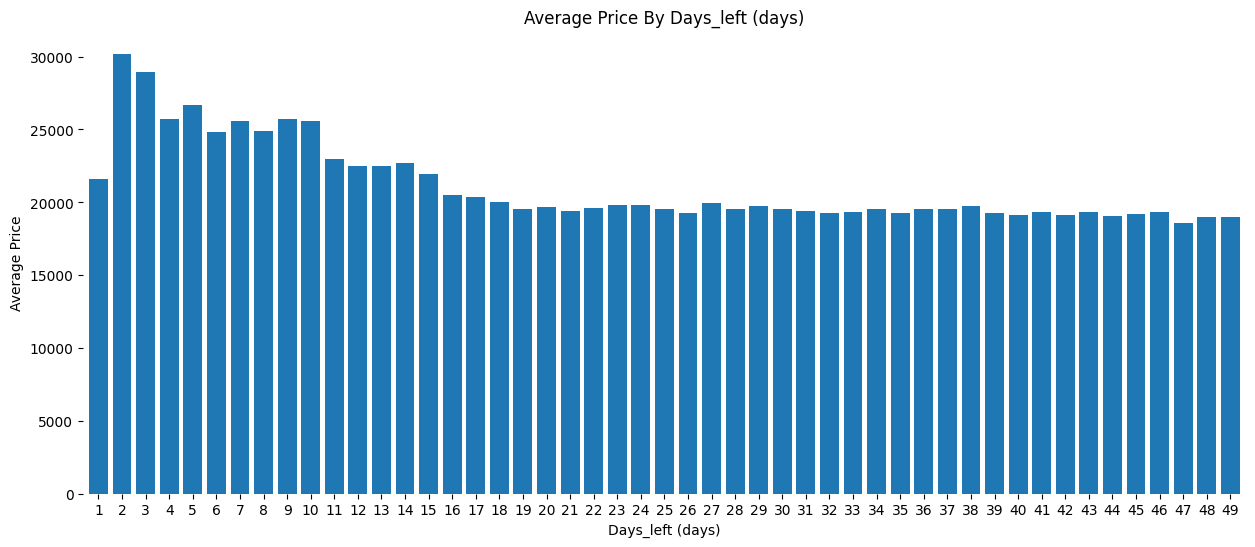

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
df.groupby(['Days_left'])['Price'].mean().plot(kind = 'bar', width= 0.8)#, color = (0.99,0.82,0.011),  edgecolor = (0.98,0.66,0.01))
ax.set(title = "Average Price By Days_left (days)",
       xlabel = "Days_left (days)",
       ylabel = "Average Price")
plt.setp(ax.get_xticklabels(), rotation = 0)
plt.box(False)
plt.show()

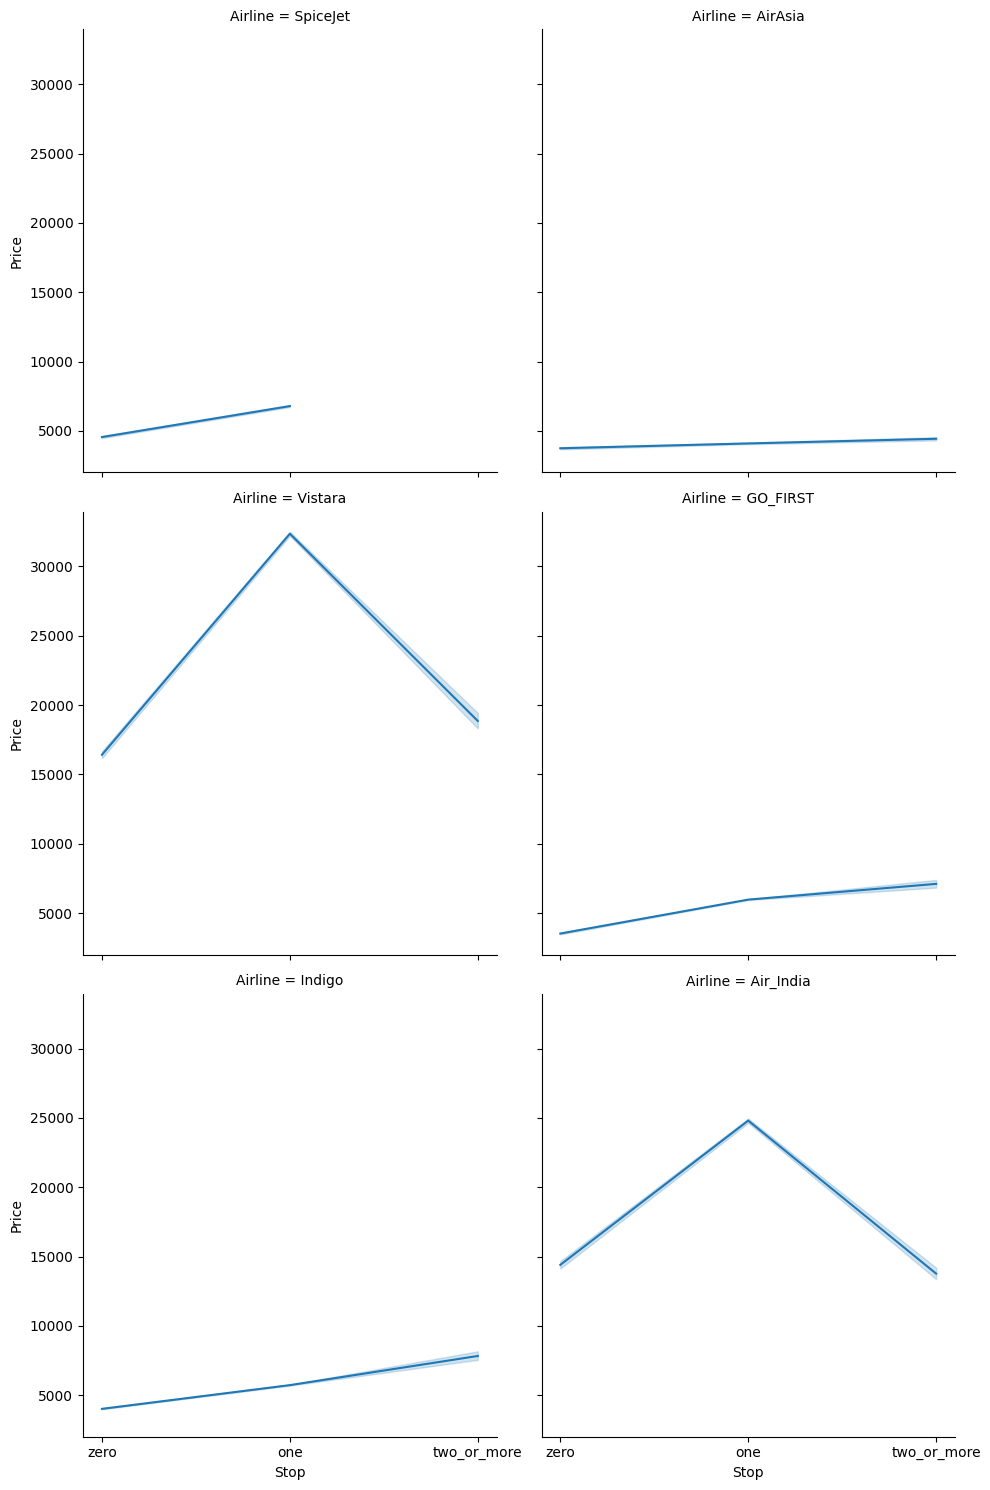

In [ ]:
sns.relplot(col="Airline", y="Price", kind="line",x='Stop', data=df, col_wrap=2)

In [ ]:
# Converting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfmodel = df
for col in dfmodel.columns:
    if dfmodel[col].dtype == 'object' or dfmodel[col].dtype == 'category':
        dfmodel[col] = le.fit_transform(dfmodel[col])

In [ ]:
dfmodel.corr().style.background_gradient()

,Airline,Flight,Source_City,Departure_Time,Stop,Arrival_Time,Destination_City,Class,Duration,Days_left,Price
Airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,-0.001651,-0.010678,0.243358
Flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.205502,-0.000443,0.305872
Source_City,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.008619,-0.003568,0.004594
Departure_Time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.084348,-0.001597,0.058319
Stop,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,-0.473860,-0.007047,-0.202620
Arrival_Time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.008679,-0.004191,0.042043
Destination_City,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.001736,-0.005323,0.004795
Class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.138710,0.013039,-0.937860
Duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,1.000000,-0.039157,0.204222
Days_left,-0.010678,-0.000443,-0.003568,-0.001597,-0.007047,-0.004191,-0.005323,0.013039,-0.039157,1.000000,-0.091949


# **PRE-PROCESSING**

In [ ]:
# Converting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfmodel = df
for col in dfmodel.columns:
    if dfmodel[col].dtype == 'object' or dfmodel[col].dtype == 'category':
        dfmodel[col] = le.fit_transform(dfmodel[col])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# storing the dependent variables in X and Independent Variable in Y
x = dfmodel.drop(['Price'], axis = 1)
y = dfmodel['Price']

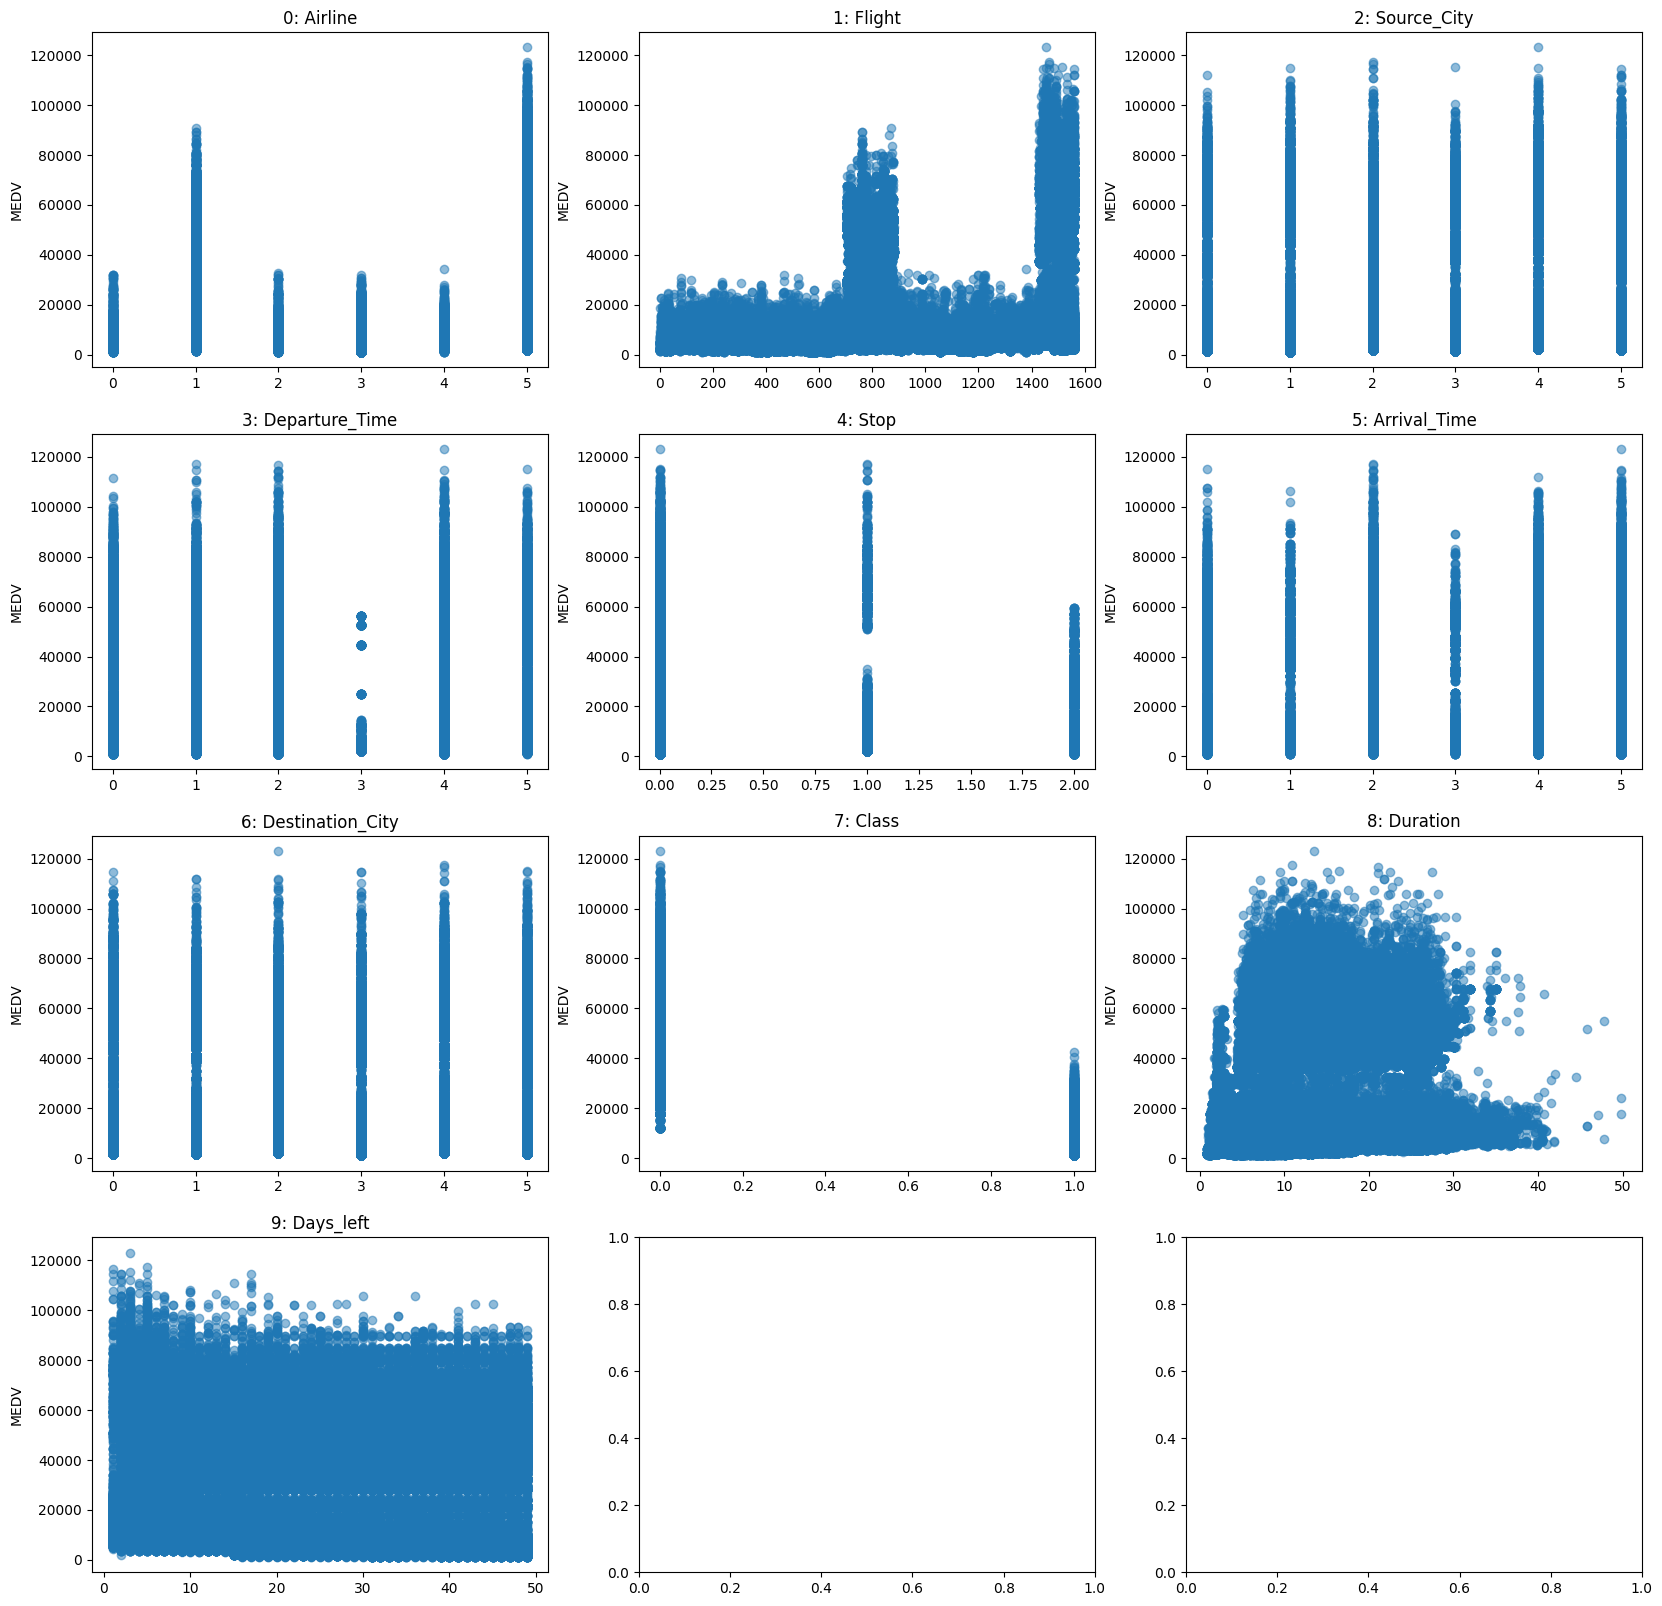

In [ ]:
#Scatter plot for each of the 10 features
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    if i >= len(x.columns):
        break
    ax.plot(x.loc[:, x.columns[i]], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, x.columns[i]))
    ax.set_ylabel("MEDV")

In [ ]:
print(x.shape)
print(y.shape)

(300153, 10)
(300153,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [ ]:
dfmodel

,Airline,Flight,Source_City,Departure_Time,Stop,Arrival_Time,Destination_City,Class,Duration,Days_left,Price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


# Linear Regression Model

In [ ]:
#create the instance
linreg=LinearRegression()
linreg = linreg.fit(x_train, y_train)

#Predict the test data
y_predict = linreg.predict(x_test)
print(y_predict)

[ 4563.82286947 52861.34766315  7910.14553752 ... -2115.46990923
  5871.53792544 -3388.29420859]


In [ ]:
#Show the model parameters
print("linreg.coef_: {}".format(linreg.coef_))
print("linreg.intercept_: {}".format(linreg.intercept_))

linreg.coef_: [ 9.20048514e+02  2.47620874e-01  1.05977856e+02  3.54300147e+01
 -3.28552501e+03  1.84910883e+02  1.22535520e+02 -4.45339692e+04
  9.06381852e+01 -1.31745674e+02]
linreg.intercept_: 50443.51723096551


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#R2 score (coefficient of determination)
print("Training set score: {:.2f}".format(linreg.score(x_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(x_test, y_test)))
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_predict)
print("Mean absolute error: %.2f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(y_test, y_predict)
print('R2-score: %.2f' % r2_test)

Training set score: 0.90
Test set score: 0.90
Mean absolute error: 4623.41
Mean squared error: 49062056.15
R2-score: 0.90


In [ ]:
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

                   Coefficient
Airline             920.048514
Flight                0.247621
Source_City         105.977856
Departure_Time       35.430015
Stop              -3285.525009
Arrival_Time        184.910883
Destination_City    122.535520
Class            -44533.969234
Duration             90.638185
Days_left          -131.745674


Text(0, 0.5, 'Actual')

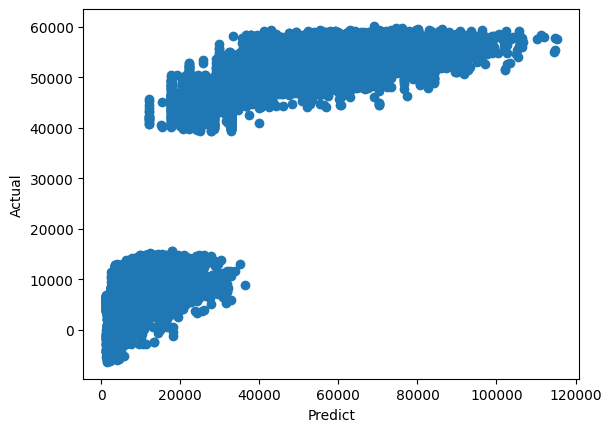

In [ ]:
## The line / model
plt.scatter(y_test, y_predict)
plt.xlabel('Predict')
plt.ylabel('Actual')

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
linreg = LinearRegression()
linreg = linreg.fit(x_train_scaled, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Training set score: {:.2f}".format (linreg.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(linreg.score(x_test_scaled, y_test)))
# Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, y_predict)
print("Mean absolute error: %.2f" % mae_test)
# Mean Square Error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance (coefficient of determination) score: 1 is perfect prediction

r2_test= r2_score(y_test, y_predict)
print('R2-score: %.2f' % r2_test)

Training set score: 0.90
Test set score: 0.90
Mean absolute error: 4623.41
Mean squared error: 49062056.15
R2-score: 0.90


In [ ]:
coeff_df = pd.DataFrame(linreg.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

                   Coefficient
Airline            1687.138868
Flight              105.533929
Source_City         185.608356
Departure_Time       62.119834
Stop              -2187.824716
Arrival_Time        322.017664
Destination_City    213.847693
Class            -20622.394499
Duration            651.540914
Days_left         -1787.554196


#Cross-Validate

In [ ]:
# Original Train
scores = cross_val_score(LinearRegression(), x_train, y_train, cv=10)
np.mean(scores)

0.9045839939536602

In [ ]:
# Scaled Train
scores = cross_val_score(LinearRegression(), x_train_scaled, y_train, cv=10)
np.mean(scores)

0.9045839939536602

In [ ]:
np.set_printoptions(suppress=True, precision=3)

In [ ]:
modelmlg = LinearRegression()

# Evaluation matrix for all algorithms

MM = [modelmlg]
for model in MM:

    # fitting model
    model.fit(x_train_scaled, y_train)

    # predicting model with test data
    y_pred = model.predict(x_test_scaled)

    # print the model name
    print('Model name', model)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, y_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, y_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y_test, y_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE(y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE
    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')

    # Calculate Adjusted R Squared values
    r_squared = round(metrics.r2_score(y_test, y_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y)-1) / (len(y)-x.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Model Name' : MM,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y_test, y_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
             'R2_Score' : metrics.r2_score(y_test, y_pred)}


Model name LinearRegression()
Mean Absolute Error (MAE):  4623.409
Mean Squared Error (MSE):  49062056.15
Root Mean Squared Error (RMSE):  7004.431
R2 Score:  0.90467
Root Mean Squared Log Error (RMSLE):  8.854
Mean Absolute Percentage Error (MAPE):  43.66 %
Adjusted R Square:  0.904669
-------------------------------------------------------------------------
